In [16]:
import requests
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as smapi
import statsmodels as sm
from scipy.optimize import minimize_scalar
import time

In [2]:
time.time()*1000

1681279290946.021

In [3]:
url = 'https://data.binance.com'
klines_url = '/api/v3/klines'
time_url = '/api/v3/time'

In [4]:
# Good pairs:
#    DOT-SOL
#    BTC-ETH


symbol1 = 'BTCBUSD'
symbol2 = 'ETHBUSD'
interval = '15m'  #MONTHLY
limit = 1000


In [5]:
#days per request

1000/24 #hours

41.666666666666664

In [6]:
DURATION = int(1000 * 3600 * 1000 / 4)
TIME_NOW = int(time.time()*1000) - int(DURATION * 0)
PERIODS = 4 * 4

params1 = {'symbol': symbol1, 'interval': interval, 'limit': limit, 'startTime': TIME_NOW - DURATION * PERIODS}
params2 = {'symbol': symbol2, 'interval': interval, 'limit': limit, 'startTime': TIME_NOW - DURATION * PERIODS}


# kline data format
#   [
#     1499040000000,      // Kline open time
#     "0.01634790",       // Open price
#     "0.80000000",       // High price
#     "0.01575800",       // Low price
#     "0.01577100",       // Close price
#     "148976.11427815",  // Volume
#     1499644799999,      // Kline Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "0"                 // Unused field, ignore.
#   ]

klines1 = []
klines2 = []
for i in range(PERIODS):
    klines1 += requests.get(url+klines_url, params1).json()
    klines2 += requests.get(url+klines_url, params2).json()
    
    params1['startTime'] += DURATION
    params2['startTime'] += DURATION

# klines1 = requests.get() + requests.get(url+klines_url, params1).json()
# klines2 = requests.get(url+klines_url, params2).json()

In [7]:
len(klines2)

16000

In [8]:
klines_df1 = pd.DataFrame(np.array(klines1), columns=['open_time','open_price','high_price','low_price','close_price','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','unused'])
klines_df2 = pd.DataFrame(np.array(klines2), columns=['open_time','open_price','high_price','low_price','close_price','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','unused'])

klines_df1




,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused
0,1666880100000,20691.63000000,20729.42000000,20644.89000000,20684.37000000,2288.09263000,1666880999999,47327550.85008640,44813,1177.08464000,24347459.58987720,0
1,1666881000000,20684.37000000,20703.59000000,20544.09000000,20566.80000000,2605.39272000,1666881899999,53737559.77306000,48230,1296.04128000,26732688.65895190,0
2,1666881900000,20566.56000000,20650.00000000,20556.36000000,20569.79000000,2274.12962000,1666882799999,46878573.07923100,42708,1138.81402000,23477149.78101760,0
3,1666882800000,20570.00000000,20638.00000000,20563.83000000,20610.00000000,1928.76809000,1666883699999,39743322.26022140,37637,953.54778000,19648627.67641960,0
4,1666883700000,20609.78000000,20640.00000000,20575.08000000,20619.73000000,1826.98438000,1666884599999,37648768.16519270,34827,927.44988000,19112774.78984690,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1681275600000,30003.14000000,30021.31000000,29965.14000000,29975.86000000,65.14347000,1681276499999,1953804.11673110,1691,30.38057000,911255.62000250,0
15996,1681276500000,29975.85000000,29986.64000000,29945.43000000,29952.47000000,41.82041000,1681277399999,1253205.83739830,1423,19.08747000,571981.12588710,0
15997,1681277400000,29952.48000000,29963.96000000,29935.48000000,29960.77000000,35.98102000,1681278299999,1077725.90096910,1407,15.74846000,471685.51643130,0
15998,1681278300000,29960.77000000,29960.77000000,29918.64000000,29942.09000000,68.37886000,1681279199999,2046773.65295080,1614,34.52771000,1033400.42433790,0


In [9]:
klines_df_f1 = pd.DataFrame(klines_df1,dtype='float64')
klines_df_f2 = pd.DataFrame(klines_df2,dtype='float64')

# for i in range(len(klines_df_f1)):
#     if i > 300:
#         klines_df_f1['open_price'][i]-=0.2
#         pass
klines_df_f1

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused
0,1.666880e+12,20691.63,20729.42,20644.89,20684.37,2288.09263,1.666881e+12,4.732755e+07,44813.0,1177.08464,2.434746e+07,0.0
1,1.666881e+12,20684.37,20703.59,20544.09,20566.80,2605.39272,1.666882e+12,5.373756e+07,48230.0,1296.04128,2.673269e+07,0.0
2,1.666882e+12,20566.56,20650.00,20556.36,20569.79,2274.12962,1.666883e+12,4.687857e+07,42708.0,1138.81402,2.347715e+07,0.0
3,1.666883e+12,20570.00,20638.00,20563.83,20610.00,1928.76809,1.666884e+12,3.974332e+07,37637.0,953.54778,1.964863e+07,0.0
4,1.666884e+12,20609.78,20640.00,20575.08,20619.73,1826.98438,1.666885e+12,3.764877e+07,34827.0,927.44988,1.911277e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1.681276e+12,30003.14,30021.31,29965.14,29975.86,65.14347,1.681276e+12,1.953804e+06,1691.0,30.38057,9.112556e+05,0.0
15996,1.681276e+12,29975.85,29986.64,29945.43,29952.47,41.82041,1.681277e+12,1.253206e+06,1423.0,19.08747,5.719811e+05,0.0
15997,1.681277e+12,29952.48,29963.96,29935.48,29960.77,35.98102,1.681278e+12,1.077726e+06,1407.0,15.74846,4.716855e+05,0.0
15998,1.681278e+12,29960.77,29960.77,29918.64,29942.09,68.37886,1.681279e+12,2.046774e+06,1614.0,34.52771,1.033400e+06,0.0


In [10]:
klines_df_f1['return'] = (klines_df_f1['close_price']-klines_df_f1['open_price'])/klines_df_f1['open_price']
klines_df_f1['return_prev'] = klines_df_f1['return'].shift(1)
klines_df_f1['open_time_year'] = klines_df_f1['open_time']/1000/3600/24/365
klines_df_f1['return']

klines_df_f2['return'] = (klines_df_f2['close_price']-klines_df_f2['open_price'])/klines_df_f2['open_price']
klines_df_f2['return_prev'] = klines_df_f2['return'].shift(1)
klines_df_f2['open_time_year'] = klines_df_f2['open_time']/1000/3600/24/365
klines_df_f2['return']

0       -0.000371
1       -0.007881
2       -0.000375
3        0.002345
4        0.001573
           ...   
15995   -0.000027
15996   -0.000273
15997   -0.000080
15998   -0.001402
15999    0.000756
Name: return, Length: 16000, dtype: float64

In [11]:
returns_df = pd.DataFrame(np.array([klines_df_f1['return'],klines_df_f2['return']]).transpose(),columns=['btc','eth'])
returns_df

,btc,eth
0,-0.000351,-0.000371
1,-0.005684,-0.007881
2,0.000157,-0.000375
3,0.001945,0.002345
4,0.000483,0.001573
...,...,...
15995,-0.000909,-0.000027
15996,-0.000780,-0.000273
15997,0.000277,-0.000080
15998,-0.000623,-0.001402


<AxesSubplot:xlabel='btc', ylabel='eth'>

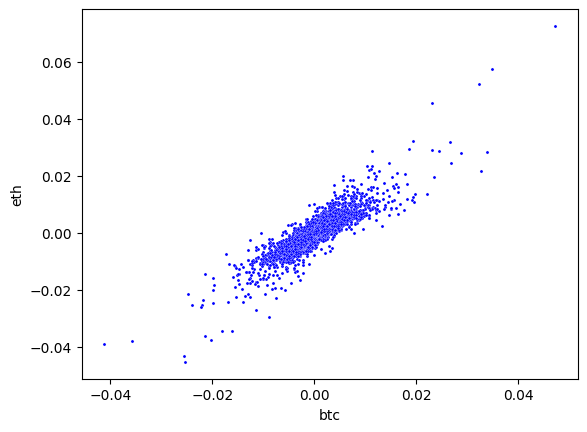

In [12]:
seaborn.scatterplot(data=returns_df,x='btc',y='eth',s=5,color='b')

<AxesSubplot:xlabel='return', ylabel='return_prev'>

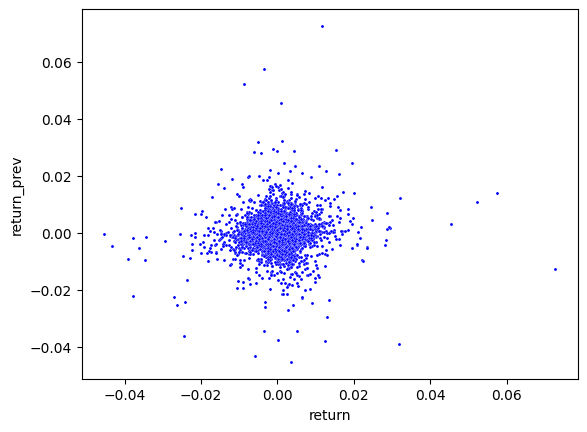

In [13]:
seaborn.scatterplot(data=klines_df_f2,x='return',y='return_prev',s=5,color='b')

In [17]:
# f1 price nonstationary
sm.tsa.stattools.adfuller(klines_df_f1['open_price'])

(0.3556616644693782,
 0.979758942867281,
 10,
 15989,
 {'1%': -3.4307590531088548,
  '5%': -2.861720784599642,
  '10%': -2.5668662271363614},
 174936.2178813003)

In [18]:
# f2 price nonstationary
sm.tsa.stattools.adfuller(klines_df_f2['open_price'])

(-0.8201575264456734,
 0.8131291225073045,
 22,
 15977,
 {'1%': -3.430759360389714,
  '5%': -2.861720920395744,
  '10%': -2.5668662994188667},
 95788.39249262332)

In [19]:
# f1 return stationary
sm.tsa.stattools.adfuller(klines_df_f1['return'])

(-26.561503842170755,
 0.0,
 21,
 15978,
 {'1%': -3.430759334765344,
  '5%': -2.861720909071611,
  '10%': -2.5668662933911772},
 -143702.44332637987)

In [20]:
# f2 return stationary
sm.tsa.stattools.adfuller(klines_df_f2['return'])

(-21.308016377699133,
 0.0,
 33,
 15966,
 {'1%': -3.4307596424696696,
  '5%': -2.861721045054842,
  '10%': -2.566866365773291},
 -136818.61459100212)

In [21]:
# Johansen test
jt = sm.tsa.vector_ar.vecm.coint_johansen(np.array([klines_df_f1['open_price'],klines_df_f2['open_price']]).transpose(),det_order=0,k_ar_diff=1)
print(f'Critical Value Eigen: \n{jt.cvm}\nCritical Value Trace: \n{jt.cvt}\n')
print(f'eigen stats: \n{jt.max_eig_stat}')
print(f'trace stats: \n{jt.trace_stat}')
                                              

Critical Value Eigen: 
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Critical Value Trace: 
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

eigen stats: 
[13.0229936   0.27268738]
trace stats: 
[13.29568098  0.27268738]


In [22]:
# Spread
df_p1 = klines_df_f1['open_price']
df_p2 = klines_df_f2['open_price']

def spread(p1, p2, n):
    psum = p1-p2*n
    return np.dot(psum,psum)

In [23]:
scalar_results = minimize_scalar(lambda n: spread(df_p1,df_p2, n))
N = scalar_results.x
scalar_results

     fun: 23768205124.77256
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 10
     nit: 4
 success: True
       x: 14.263196909546082

In [35]:
OPT_INTERVAL = 50 * 4 #10 hours
BREAK_MARGIN = 0.05 #5%

spread_data = pd.DataFrame([klines_df_f1['open_time'],klines_df_f1['open_price'],klines_df_f2['open_time'],klines_df_f2['open_price']]).transpose()
spread_data.columns = ['open_time1','open_price1','open_time2','open_price2']

spread_n = []
prev_scalar_x = None
break_history = []
clear_history = []
i = 0
while i < len(klines_df_f1):
    # FIX SPREAD_NOW SO THAT IT DOESNT OPTIMIZE BASED ON OPT_INTERVAL AT EVERY STEP
    if i == OPT_INTERVAL or i == OPT_INTERVAL + 1:
        scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
        spread_n.append(scalar_results.x)
        
    elif i > OPT_INTERVAL + 1:
        scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
        
        # Simulate conditions for trading
        
        spread_prev = spread_data['open_price1'][i-1] - spread_n[i-1] * spread_data['open_price2'][i-1]
        spread_prev_prev = spread_data['open_price1'][i-2] - spread_n[i-2] * spread_data['open_price2'][i-2]
        
        if spread_prev_prev * spread_prev < 0 or np.abs(spread_prev/(spread_data['open_price1'][i] + scalar_results.x * spread_data['open_price2'][i])) > BREAK_MARGIN:
            if np.abs(spread_prev/(spread_data['open_price1'][i] + scalar_results.x * spread_data['open_price2'][i])) > BREAK_MARGIN:
                break_history.append(i)
            else:
                clear_history.append(i)
                
            for j in range(OPT_INTERVAL):
                spread_n.append(None)
            i += OPT_INTERVAL
            scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
            spread_n.append(scalar_results.x)
            
            i += 1
            scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
            spread_n.append(scalar_results.x)
            
            i += 1
            scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
            spread_n.append(scalar_results.x)
        else:
            spread_n.append(spread_n[i-1])
            
        # End of simulation
        
        #spread_n.append(scalar_results.x)
    else:
        spread_n.append(None)
        
    i += 1

spread_data['spread_n'] = spread_n[0:len(spread_data)]
spread_data['spread'] = spread_data['open_price1'] - spread_data['spread_n'] * spread_data['open_price2']
spread_data['position_size'] = spread_data['open_price1']+ spread_data['spread_n'] * spread_data['open_price2']
spread_data['spread_percentage'] = spread_data['spread']/spread_data['position_size']*100

spread_data['spread_SMA100'] = spread_data['spread'].rolling(100).mean()

len(spread_data)    

16000

In [36]:
break_history, clear_history

([11236],
 [601, 883, 1088, 1338, 1612, 1832, 2831, 3135, 3362, 7046, 7330, 13238])

In [37]:
profit_margin = 2.2 * len(clear_history) - 5 * len(break_history)
profit_margin

21.400000000000002

<AxesSubplot:xlabel='open_time1', ylabel='spread_n'>

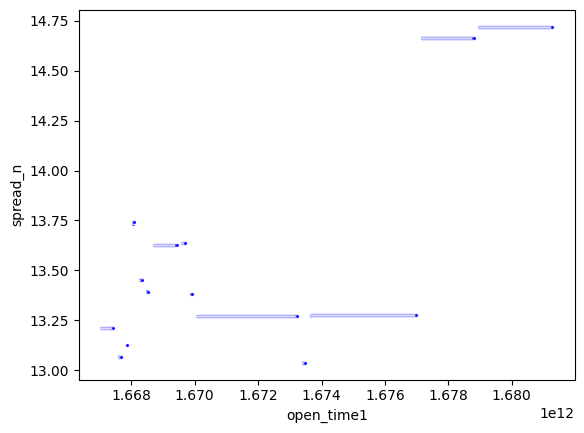

In [38]:
# Graph spread_n

seaborn.scatterplot(data=spread_data,x='open_time1',y='spread_n',s=5,color='b')

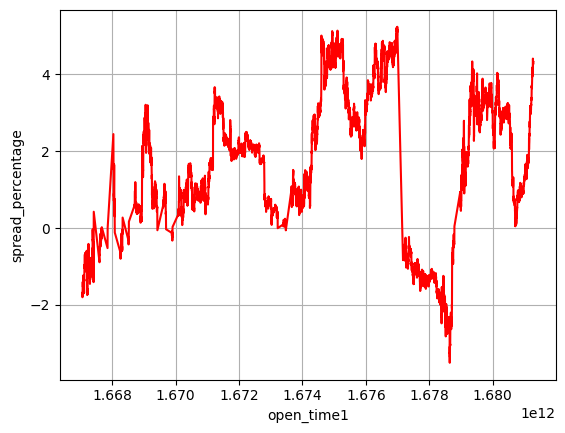

In [39]:
ax = seaborn.lineplot(data=spread_data,x='open_time1',y='spread_percentage',color='r')
# ax.set(ylim=(-0.12,0.01))
# ax.set(xlim=(5.2e7+1.6801e12,6e7+1.6801e12))
spread_data['spread_n'][40:80]
plt.grid()

<AxesSubplot:xlabel='open_time1', ylabel='spread'>

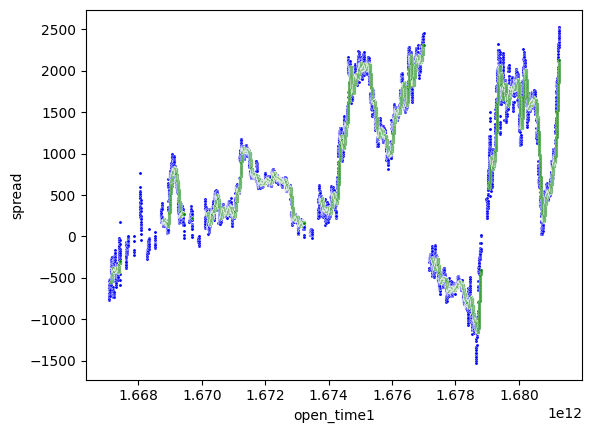

In [29]:
# graph_df = pd.DataFrame(np.array([klines_df_f1['open_time'],klines_df_f1['open_price'] - N * klines_df_f2['open_price']]).transpose(),columns = ['open_time','price'])
# seaborn.scatterplot(data=graph_df,x='open_time',y='price',s=5,color='b')

seaborn.scatterplot(data=spread_data,x='open_time1',y='spread',s=5,color='b')
seaborn.scatterplot(data=spread_data,x='open_time1',y='spread_SMA100',s=5,color='g')
# seaborn.scatterplot(data=spread_data,x='open_time1',y='position_size',s=5,color='r')



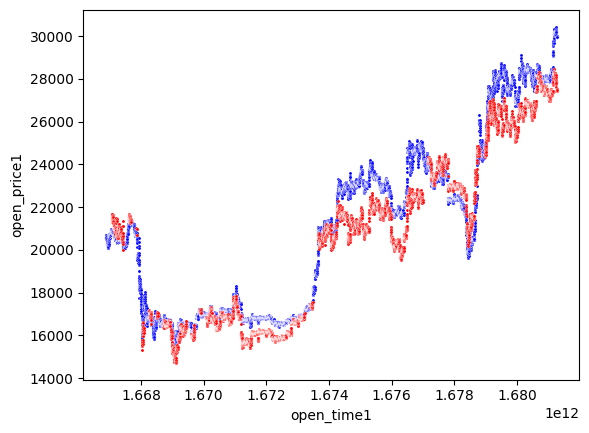

In [30]:
# HAVE NOT UPDATED

seaborn.scatterplot(data=spread_data,x='open_time1',y='open_price1',s=5,color='b')
spread_data['scaled_price2'] = spread_data['open_price2'] * spread_data['spread_n']
ax = seaborn.scatterplot(data=spread_data,x='open_time1',y='scaled_price2',s=5,color='r')
# ax.set(ylim=(0,10))
# ax.set(xlim=(5.2e7+1.6801e12,6e7+1.6801e12))

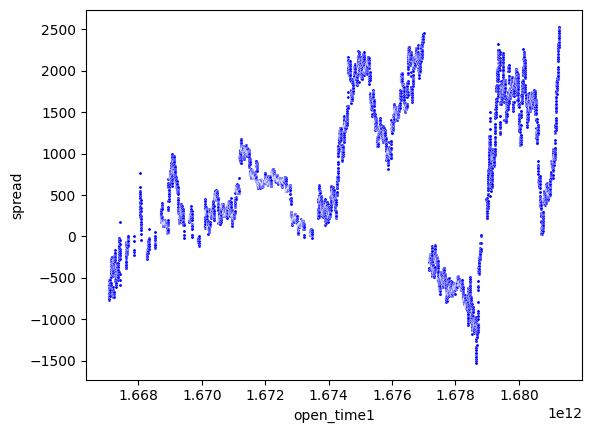

In [31]:
ax = seaborn.scatterplot(data=spread_data,x='open_time1',y='spread',s=5,color='b')
# ax.set(xlim=(5.2e7+1.6801e12,5.4e7+1.6801e12))

In [32]:
spread_data['spread_prev'] = spread_data['spread'].shift(1)
spread_data['spread_return'] = (spread_data['spread']-spread_data['spread_prev'])/spread_data['spread_prev']
spread_data['spread_return_prev'] = spread_data['spread_return'].shift(1)

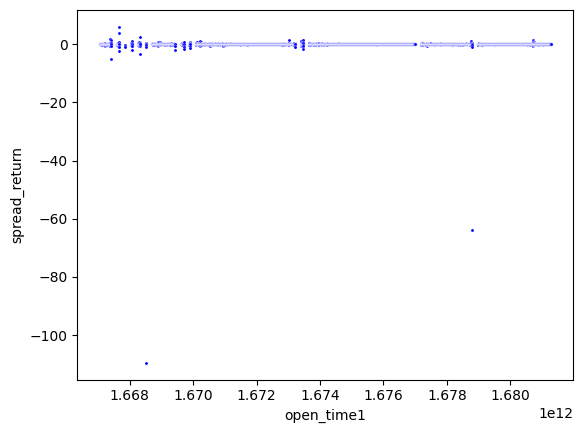

In [33]:
ax = seaborn.scatterplot(data=spread_data,x='open_time1',y='spread_return',s=5,color='b')

0.12680859209091508

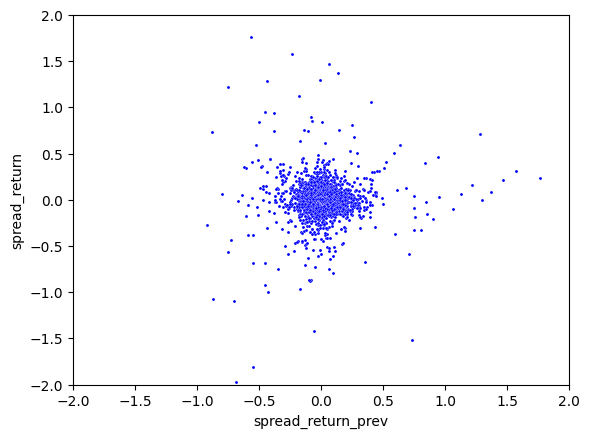

In [34]:
ax = seaborn.scatterplot(data=spread_data,x='spread_return_prev',y='spread_return',s=5,color='b')
ax.set(xlim=(-2,2))
ax.set(ylim=(-2,2))
spread_data['spread_return_prev'].corr(spread_data['spread_return'])